In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from scipy.stats import shapiro
!pip install imblearn

In [2]:
spotify = pd.read_csv('dataset.csv',index_col=0)
spotify.shape 

(114000, 20)

In [3]:
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
spotify.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
spotify.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
spotify.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
spotify = spotify.drop(['track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'time_signature', 'track_genre'], axis = 1)

In [8]:
spotify

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113996,22,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113997,22,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113998,41,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [9]:
(spotify['popularity'] > 50).sum()/len(spotify['popularity'])*100 #to check how many popular songs exists

24.359649122807017

In [10]:
spotify['popularity'] > 50

0          True
1          True
2          True
3          True
4          True
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Name: popularity, Length: 114000, dtype: bool

In [11]:
spotify = spotify.loc[spotify["popularity"] >50]

In [12]:
spotify.isna().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [13]:
spotify.isnull().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [14]:
spotify.dtypes

popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [15]:
spotify.value_counts().sum()/len(spotify) #no duplicates 

1.0

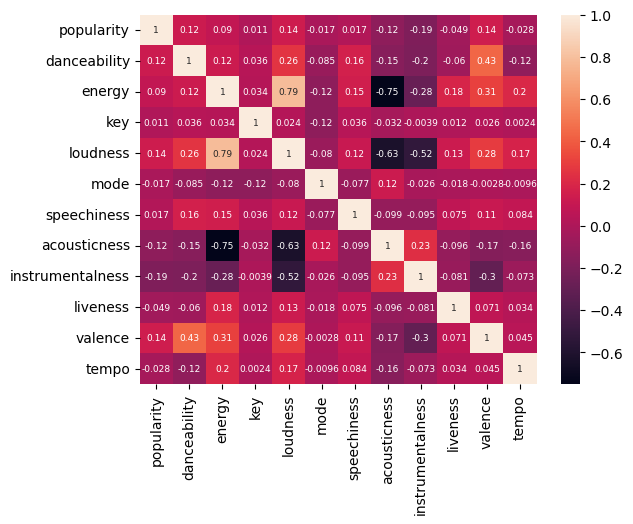

In [16]:
sns.heatmap(spotify.corr(),annot=True,annot_kws={"size": 6.5})
plt.show()

In [17]:
spotify=spotify.drop(['energy','acousticness'],axis =1)

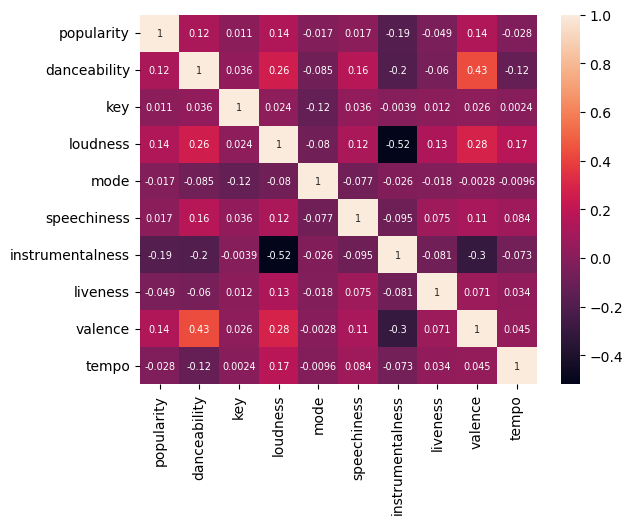

In [18]:
sns.heatmap(spotify.corr(),annot=True,annot_kws={"size": 7})
plt.show()

In [19]:
spotify=spotify.drop(['valence'],axis =1)

In [20]:
def plot_distribution(spotify):
    for col in spotify.columns:
        stat, p = shapiro(spotify[col])

        if p > 0.05:
            print('The data is normal.')
        else:
            print('The data is likely not normal.')
            
    return spotify

In [21]:
plot_distribution(spotify)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,popularity,danceability,key,loudness,mode,speechiness,instrumentalness,liveness,tempo
0,73,0.676,1,-6.746,0,0.1430,0.000001,0.3580,87.917
1,55,0.420,1,-17.235,1,0.0763,0.000006,0.1010,77.489
2,57,0.438,0,-9.734,1,0.0557,0.000000,0.1170,76.332
3,71,0.266,0,-18.515,1,0.0363,0.000071,0.1320,181.740
4,82,0.618,2,-9.681,1,0.0526,0.000000,0.0829,119.949
...,...,...,...,...,...,...,...,...,...
113665,55,0.254,4,-9.225,1,0.0395,0.000032,0.0532,147.561
113752,51,0.397,11,-5.316,1,0.0316,0.000083,0.1130,136.017
113821,54,0.282,9,-5.330,1,0.0446,0.000000,0.3500,82.702
113872,59,0.575,8,-13.168,1,0.0363,0.000661,0.1150,82.691


In [22]:
Y = pd.DataFrame(spotify['popularity']) #defying Y

In [24]:
X = spotify.drop(['popularity'],axis=1) #droping Y from X

In [25]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X)
x_min_max = transformer.transform(X)
X = pd.DataFrame(x_min_max)

In [26]:
plot_distribution(spotify)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,popularity,danceability,key,loudness,mode,speechiness,instrumentalness,liveness,tempo
0,73,0.676,1,-6.746,0,0.1430,0.000001,0.3580,87.917
1,55,0.420,1,-17.235,1,0.0763,0.000006,0.1010,77.489
2,57,0.438,0,-9.734,1,0.0557,0.000000,0.1170,76.332
3,71,0.266,0,-18.515,1,0.0363,0.000071,0.1320,181.740
4,82,0.618,2,-9.681,1,0.0526,0.000000,0.0829,119.949
...,...,...,...,...,...,...,...,...,...
113665,55,0.254,4,-9.225,1,0.0395,0.000032,0.0532,147.561
113752,51,0.397,11,-5.316,1,0.0316,0.000083,0.1130,136.017
113821,54,0.282,9,-5.330,1,0.0446,0.000000,0.3500,82.702
113872,59,0.575,8,-13.168,1,0.0363,0.000661,0.1150,82.691


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.45, random_state=100)

In [28]:
def function_apply(model_list,X_train,y_train,y_test):
    preds = {}
    for model_name in model_list:
        if model_name == 'LinearRegressor':
            model = linear_model.LinearRegression()
        elif model_name == 'KNeighborsRegressor':
            model = KNeighborsRegressor(n_neighbors=10)

        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        preds[model_name] = r2_score(y_test, predictions)
    return preds

In [29]:
model_list=['LinearRegressor','KNeighborsRegressor']
function_apply(model_list,X_train,y_train,y_test)    


{'LinearRegressor': 0.05183822112170566,
 'KNeighborsRegressor': 0.05088506363929568}